In [72]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import LinearSVC
     

In [73]:
!gdown 1LjzN_vr1naTDHFlcbMxSl1nd5BbgtjdN


Downloading...
From: https://drive.google.com/uc?id=1LjzN_vr1naTDHFlcbMxSl1nd5BbgtjdN
To: /content/bank-full.csv
100% 4.61M/4.61M [00:00<00:00, 92.4MB/s]


In [76]:
dataset = pd.read_csv("bank-full.csv", delimiter=';')
dataset.shape
dataset
     

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [77]:
groupFeatures = [feature for feature in dataset.columns if ((dataset[feature].dtypes=='O')&(feature not in ['y']))]
groupFeatures
for feature in groupFeatures:
    print('Feature : {} --> Unique Count {}'.format(feature,len(dataset[feature].unique())))
     

Feature : job --> Unique Count 12
Feature : marital --> Unique Count 3
Feature : education --> Unique Count 4
Feature : default --> Unique Count 2
Feature : housing --> Unique Count 2
Feature : loan --> Unique Count 2
Feature : contact --> Unique Count 3
Feature : month --> Unique Count 12
Feature : poutcome --> Unique Count 4


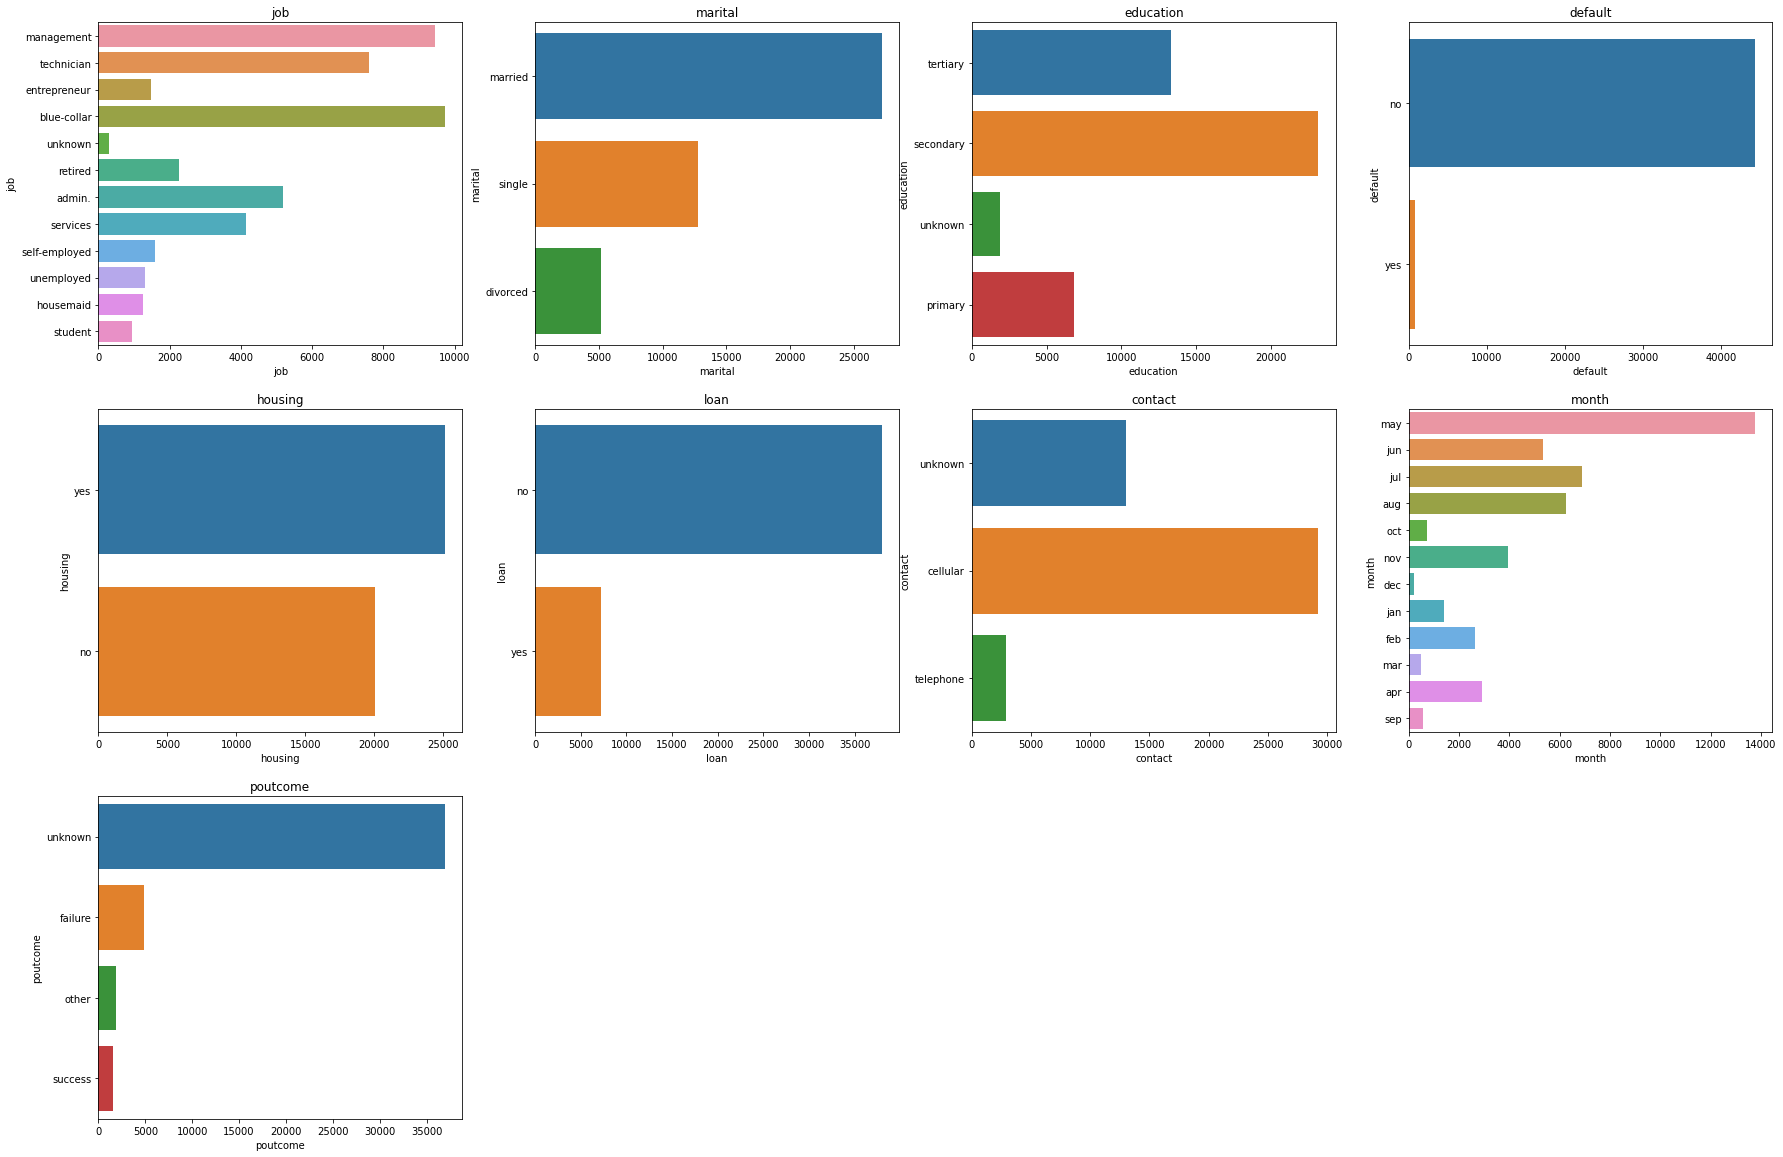

In [78]:
plt.figure(figsize=(30,70))
plotnumber =1
for groupFeature in groupFeatures:
    ax = plt.subplot(10,4,plotnumber)
    plotnumber+=1
    sns.countplot(y=groupFeature,data=dataset)
    plt.xlabel(groupFeature)
    plt.title(groupFeature)
plt.show()

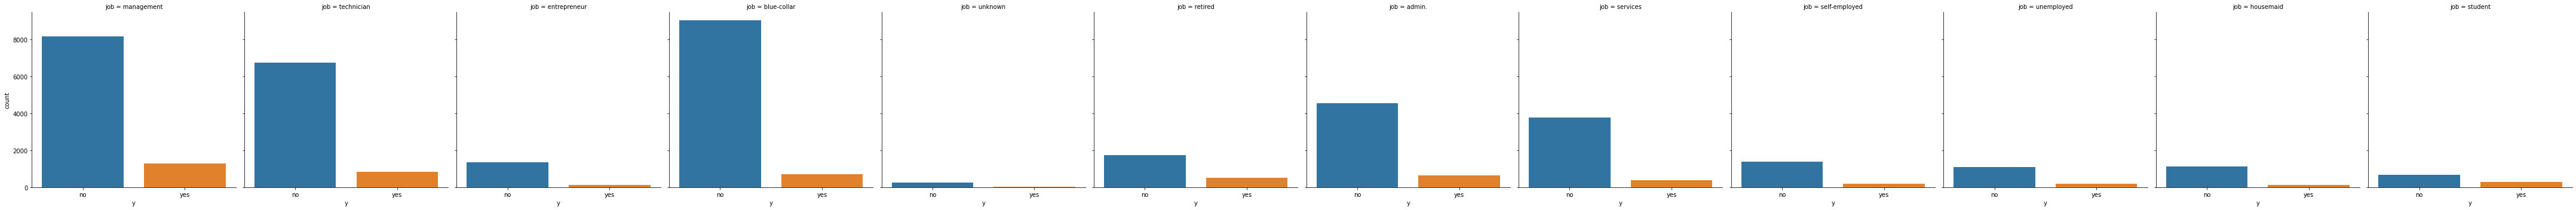

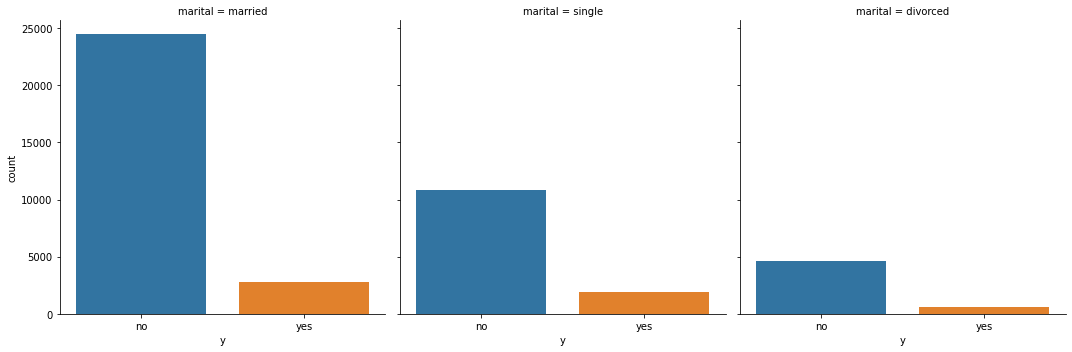

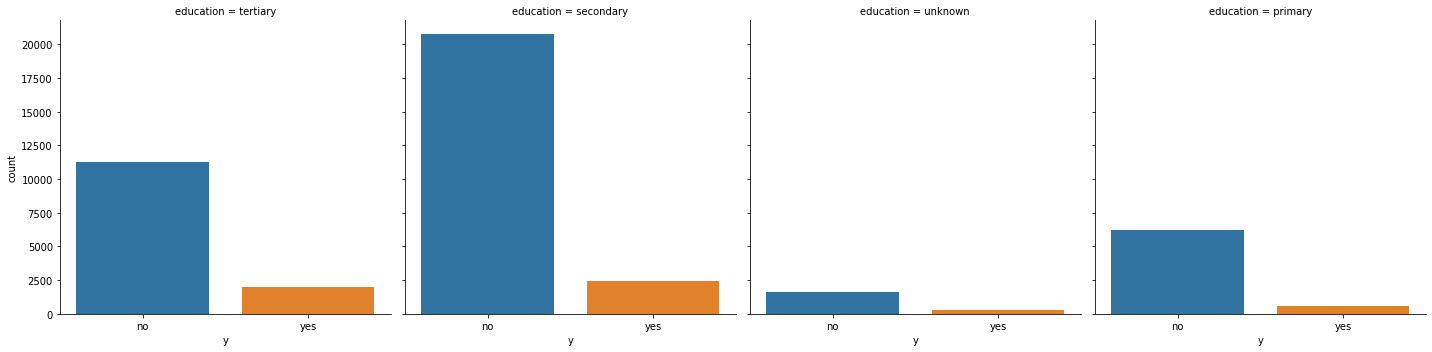

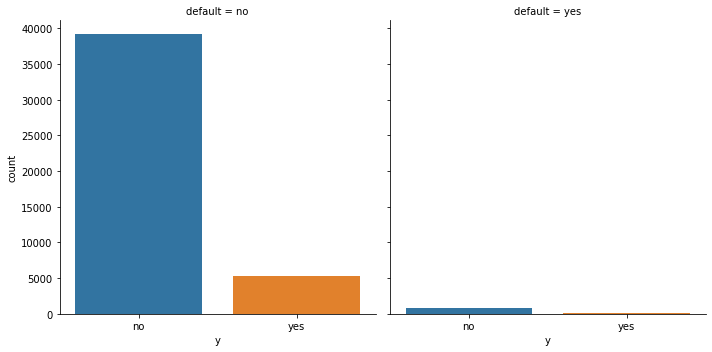

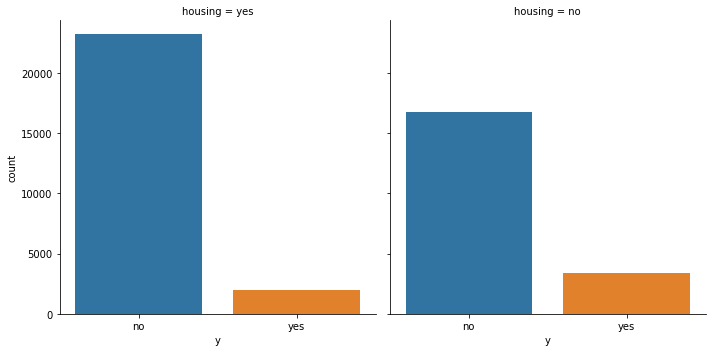

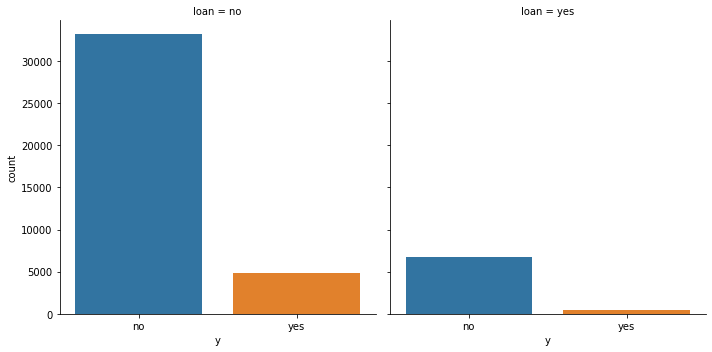

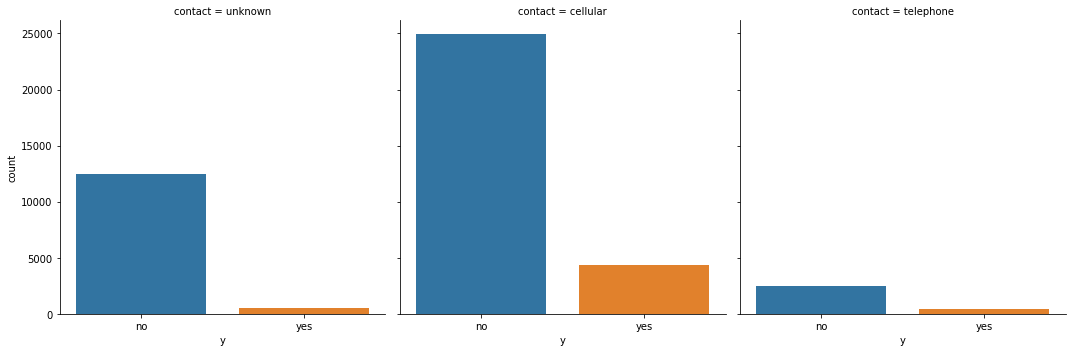

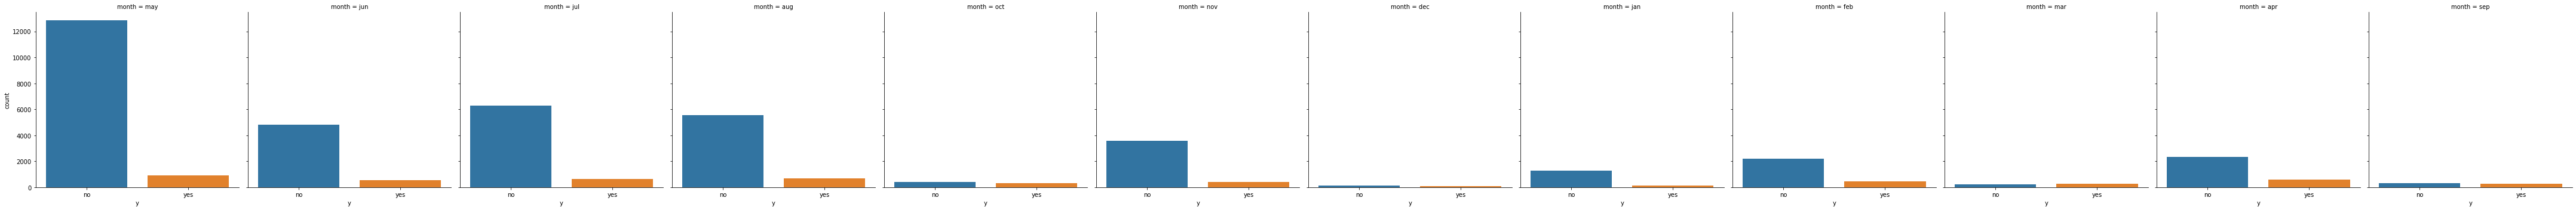

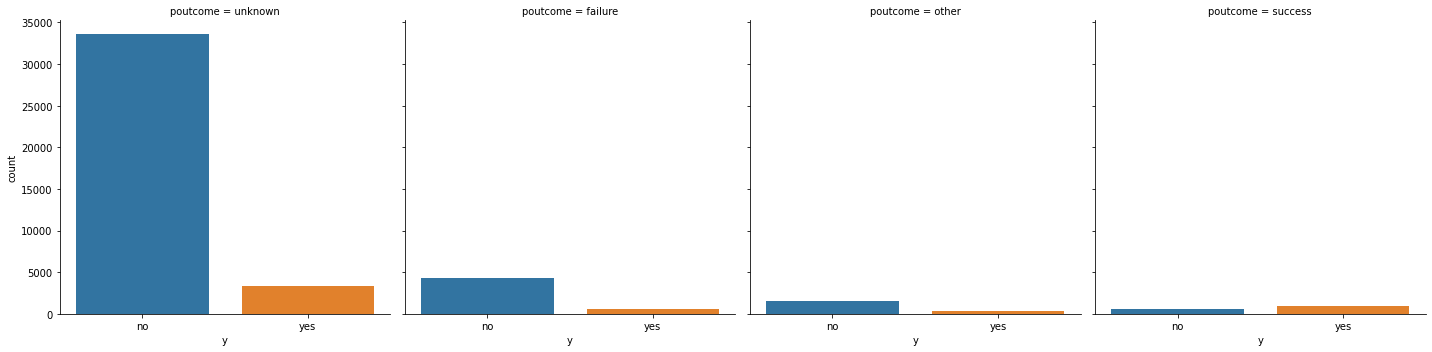

In [79]:
for groupFeature in groupFeatures:
    sns.catplot(x='y', col=groupFeature, kind='count', data  = dataset)
plt.show()

In [80]:
numFeatures = [feature for feature in dataset.columns if ((dataset[feature].dtypes!='O')&(feature not in ['y']))]
numFeatures

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

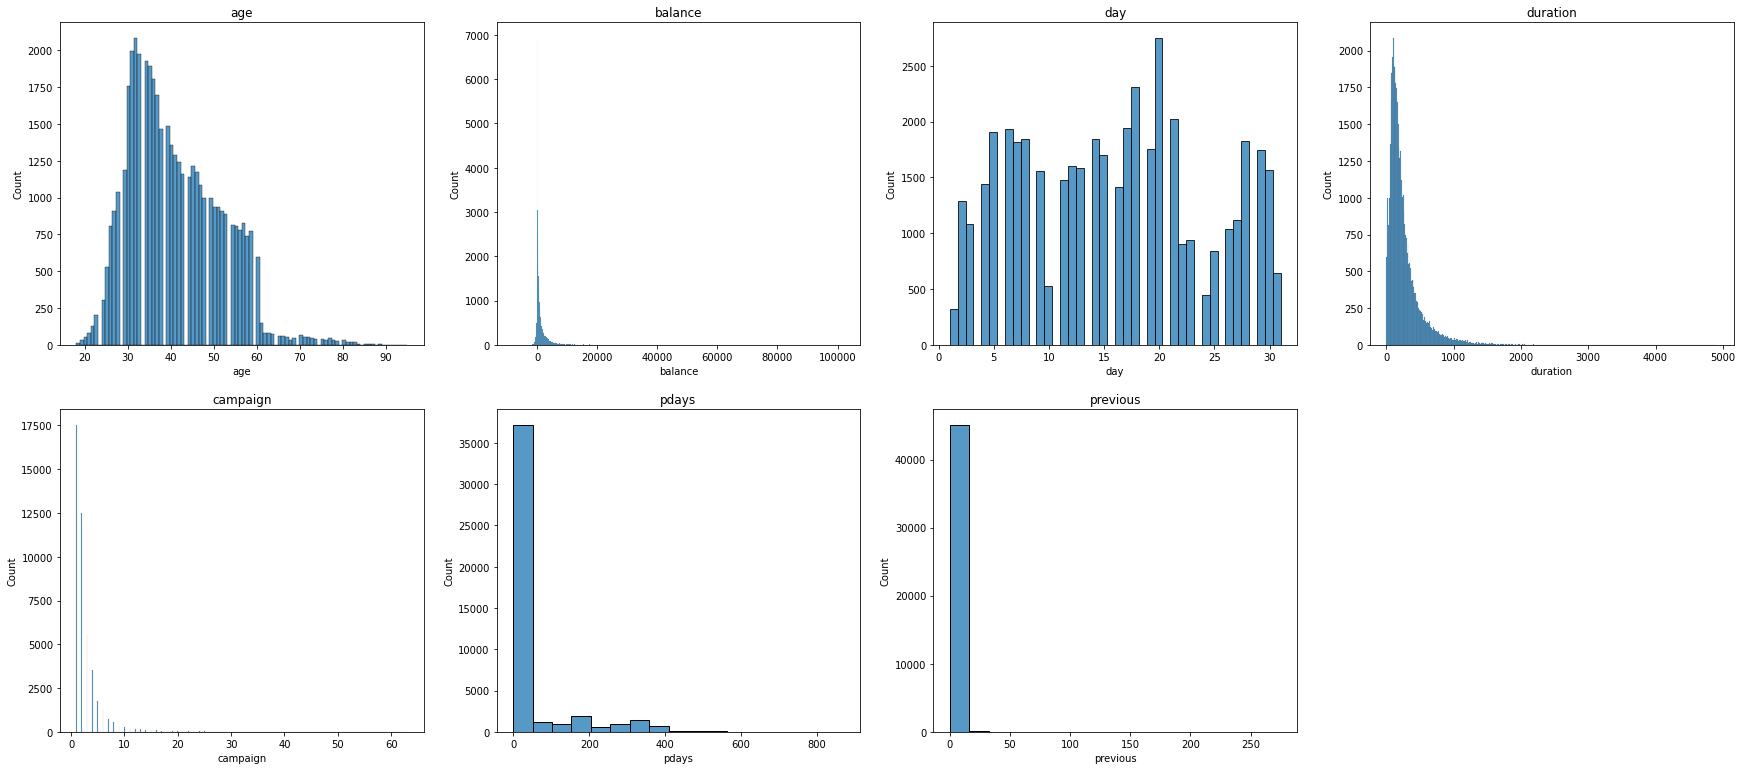

In [81]:
plt.figure(figsize=(30,70))
plotnumber =1
for numFeature in numFeatures:
    ax = plt.subplot(10,4,plotnumber)
    plotnumber+=1
    sns.histplot(dataset[numFeature])
    plt.xlabel(numFeature)
    plt.title(numFeature)
plt.show()

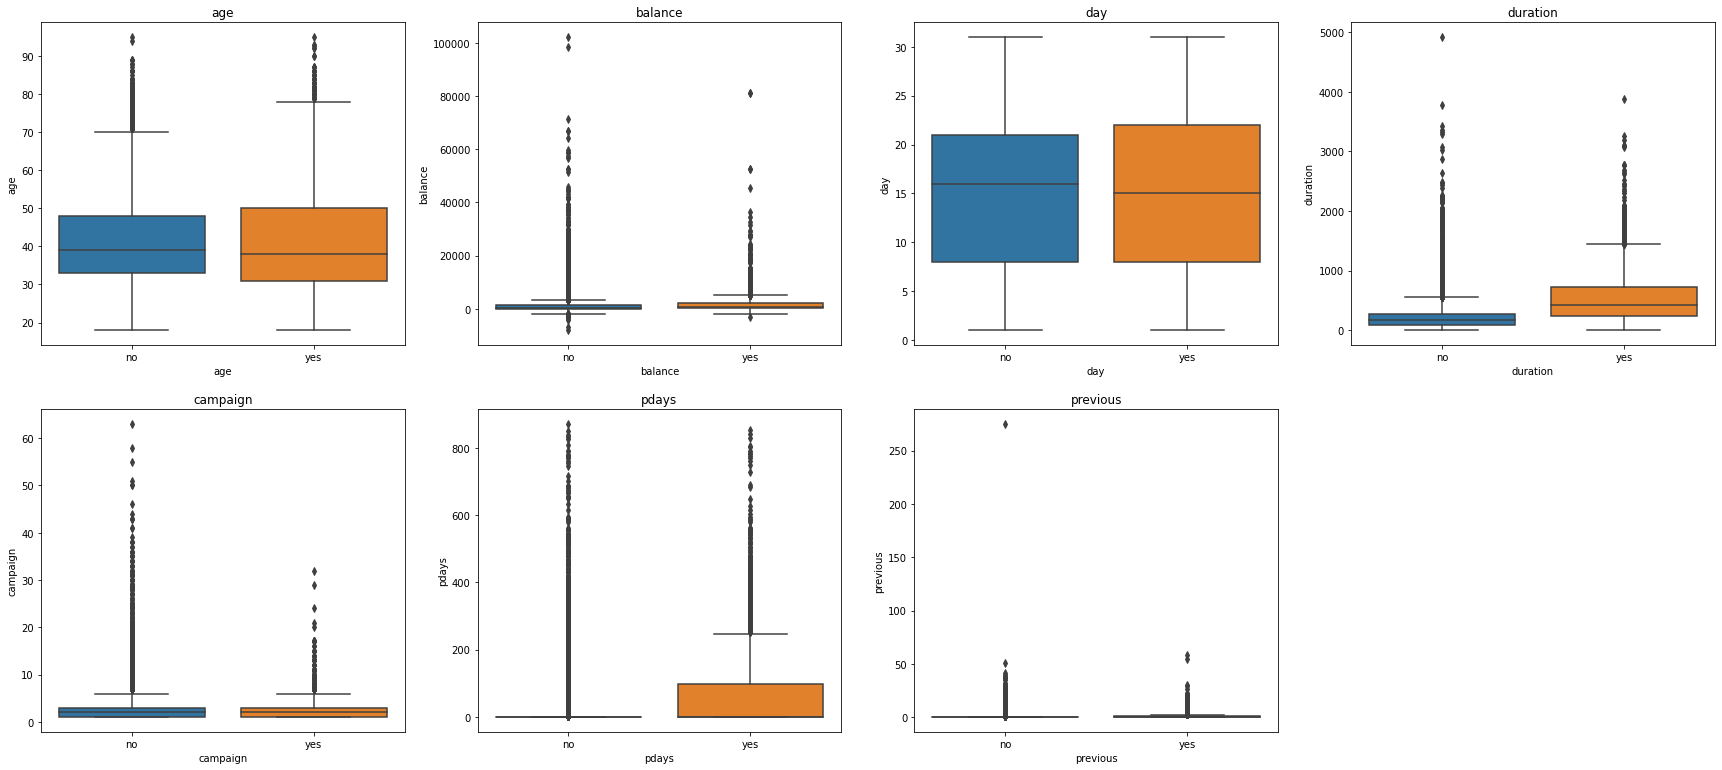

In [82]:
plt.figure(figsize=(30,70))
plotnumber =1
for numFeature in numFeatures:
    ax = plt.subplot(10,4,plotnumber)
    plotnumber+=1
    sns.boxplot(x='y', y=dataset[numFeature], data = dataset)
    plt.xlabel(numFeature)
    plt.title(numFeature)
plt.show()

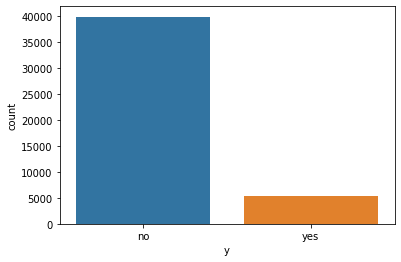

y
no     39922
yes     5289
Name: y, dtype: int64

In [85]:
sns.countplot(x='y',data=dataset)
plt.show()
dataset['y'].groupby(dataset['y']).count()


In [94]:
dataset2 =dataset.copy()

dataset2.shape
dataset2.groupby(['y','default']).size()
dataset2.drop(['default'],axis=1, inplace=True)
dataset2.groupby(['y','pdays']).size()
dataset2.drop(['pdays'],axis=1, inplace=True)

In [95]:
groupColumns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  groupColumns:
    dataset2 = pd.concat([dataset2.drop(col, axis=1),pd.get_dummies(dataset2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [96]:
booleanColumns = ['housing', 'loan', 'y']
for col in  booleanColumns:
    dataset2[col+'New']=dataset2[col].apply(lambda x : 1 if x == 'yes' else 0)
    dataset2.drop(col, axis=1, inplace=True)
     

In [97]:
dataset2

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housingNew,loanNew,yNew
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45207,71,1729,17,456,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45208,72,5715,17,1127,5,3,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
45209,57,668,17,508,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [98]:
X = dataset2.drop(['yNew'],axis=1)
Y = dataset2['yNew']
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2, random_state=0)
print(" For Training dataset =",len(trainX), "\n For Testing dataset =",len(testX))

 For Training dataset = 36168 
 For Testing dataset = 9043


In [100]:
modelSVC= LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001,C=0.55, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=42, max_iter=3000)
modelSVC.fit(trainX,trainY)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.55, max_iter=3000, random_state=42)

In [108]:
predictY=modelSVC.predict(testX)
print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=7))

0.7891186553135021
[[6357 1623]
 [ 284  779]]
              precision    recall  f1-score   support

           0  0.9572354 0.7966165 0.8695712      7980
           1  0.3243131 0.7328316 0.4496392      1063

    accuracy                      0.7891187      9043
   macro avg  0.6407742 0.7647241 0.6596052      9043
weighted avg  0.8828357 0.7891187 0.8202084      9043



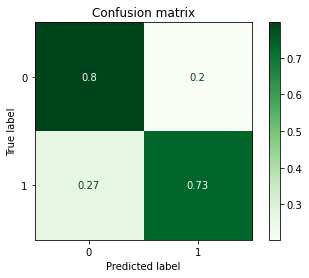

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay.from_estimator(modelSVC, testX, testY, cmap=plt.cm.Greens, normalize='true')
plt.title('Confusion matrix')
plt.show(matrix)
plt.show()

In [115]:
y_pred = modelSVC.predict(testX)
accuracy = accuracy_score(testY, predictY) * 100.0
print("Accuracy for SVM : ",accuracy)

Accuracy for SVM :  78.91186553135022
